In [10]:
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

## Linear Regression with Tensorflow
### Fiting to linear function to our data:
$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

### Objective: 
* Finding the best values of parameters $\theta_0, \theta_1, \ldots, \theta_n$ minimizing error MSE. 


## Linear Regression (Image from Wikipedia):


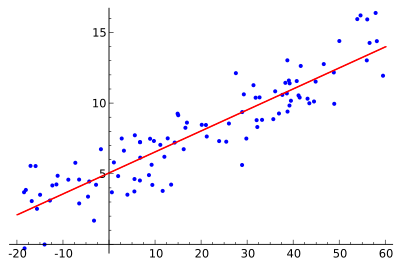

In [1]:
from IPython.display import Image
Image(filename='Linear_regression.png')

## Methods for Linear Regression:

#### 1. Normal Equation
We explicitly determine the value of the parameter vector $\theta = (\theta_0, \theta_1, \ldots, \theta_n)$ through the following equation:
+ Let **$X$** be our input data
+ Let $y$ be target variable

Then $\theta = (X^tX)^{-1}X^ty$. 


#### 2. (Batch) Gradianet Decent Algorithm:
* Find the gradianet of MSE
* Update the vector parameter $\theta = (\theta_0, \theta_1, \ldots, \theta_n)$ by $\theta := \theta - \lambda\nabla(MSE)$, where $\lambda$ is our learning rate. 
* Do it until you arrive in a predifnined iteration or you arrive in your desired error

### Using the Normal Equation

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
type(housing)

sklearn.datasets.base.Bunch

In [12]:
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [13]:
heads = housing.feature_names

hdata = pd.DataFrame(housing.data, columns = heads)
hdata.head(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [19]:
m, n = hdata.shape ## Dimension of data
m,n

(20640, 8)

In [21]:
## We get traget variable by housing.target and then make it into a long column

housing.target.reshape(-1,1) ### the same as housing.target.reshape(m,1)

array([[ 4.526],
       [ 3.585],
       [ 3.521],
       ..., 
       [ 0.923],
       [ 0.847],
       [ 0.894]])

## Adding bias (all-one) as a new column

In [32]:
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data] ## Adding bias (all-one) as a new column
biased_data = pd.DataFrame(housing_data_plus_bias, columns = ["Biased_Term"] +heads)
biased_data[:5]

,Biased_Term,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
reset_graph()

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()
    
theta_value


array([[ -3.74651413e+01],
       [  4.35734153e-01],
       [  9.33829229e-03],
       [ -1.06622010e-01],
       [  6.44106984e-01],
       [ -4.25131839e-06],
       [ -3.77322501e-03],
       [ -4.26648885e-01],
       [ -4.40514028e-01]], dtype=float32)

## Will get the same by pure NumPy or Scikit-learn?

### We first compute $\theta$ by pure numpy: 

In [87]:
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_numpy

array([[ -3.69419202e+01],
       [  4.36693293e-01],
       [  9.43577803e-03],
       [ -1.07322041e-01],
       [  6.45065694e-01],
       [ -3.97638942e-06],
       [ -3.78654265e-03],
       [ -4.21314378e-01],
       [ -4.34513755e-01]])

## $\theta$ by Scikit Learn

In [88]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

scikitlrn_theta = (np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])
scikitlrn_theta

array([[ -3.69419202e+01],
       [  4.36693293e-01],
       [  9.43577803e-03],
       [ -1.07322041e-01],
       [  6.45065694e-01],
       [ -3.97638942e-06],
       [ -3.78654265e-03],
       [ -4.21314378e-01],
       [ -4.34513755e-01]])

## Manually Computing Gradients

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [64]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta") # Random inotialization of weights
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse") ## Mean of square errors
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients) # Assigns a new value to theta

init = tf.global_variables_initializer() ## Initialize all variables

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval()) 
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147


In [65]:
best_theta

array([[ 2.06855249],
       [ 0.88740271],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393812],
       [-0.04269557],
       [-0.66145277],
       [-0.63752776]], dtype=float32)

### Using autodiff
Same as above except for the __gradients = ... line__

In [67]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [68]:
gradients = tf.gradients(mse, [theta])[0]

In [69]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147
Best theta:
[[ 2.06855249]
 [ 0.88740271]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145277]
 [-0.6375277 ]]


### Using a GradientDescentOptimizer

In [70]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [71]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [72]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147
Best theta:
[[ 2.06855249]
 [ 0.88740271]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145277]
 [-0.6375277 ]]


## Using a momentum optimizer

In [73]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [74]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)

In [75]:
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Best theta:
[[ 2.06855798]
 [ 0.82962859]
 [ 0.11875337]
 [-0.26554456]
 [ 0.30571091]
 [-0.00450251]
 [-0.03932662]
 [-0.89986444]
 [-0.87052065]]


## Mini-batch Gradient Descent

In [77]:
n_epochs = 1000
learning_rate = 0.01

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [78]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

"""
Based on the given index, returns the corersponding batch of data
"""
def fetch_batch(epoch, batch_index, batch_size): 
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = scaled_housing_data_plus_bias[indices] 
    y_batch = housing.target.reshape(-1, 1)[indices] 
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [79]:
best_theta

array([[ 2.07033372],
       [ 0.86371452],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.80304712]], dtype=float32)

## Showing Graphs Using TensorBoard


In [83]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)


n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()


In [84]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))


In [86]:
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()   